# Numpy and Algebra

## Solving linear systems

In [2]:
import numpy as np

In [3]:
A = np.mat("1, 2, 3; 0, 3, 5; -3, 2, 9")
A

matrix([[ 1,  2,  3],
        [ 0,  3,  5],
        [-3,  2,  9]])

In [4]:
b = np.array([1, 4, 9])
b

array([1, 4, 9])

In [5]:
x = np.linalg.solve(A, b)
x

array([-1.57142857,  0.85714286,  0.28571429])

In [7]:
np.dot(A, x)-b

matrix([[2.22044605e-16, 0.00000000e+00, 0.00000000e+00]])

## 方阵的特征值和特征向量

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [9]:
eigenvalues

array([8.91263421, 3.65794308, 0.42942271])

### 特征向量按列排列

In [10]:
eigenvectors

matrix([[-0.41242014,  0.66619287, -0.58072673],
        [-0.58824377,  0.73940537,  0.72401805],
        [-0.69561405,  0.09729733, -0.37222887]])

In [11]:
np.dot(A, eigenvectors[:, 0]) - eigenvalues[0]*eigenvectors[:, 0]

matrix([[3.55271368e-15],
        [2.66453526e-15],
        [8.88178420e-16]])

### 随机数和随机排列

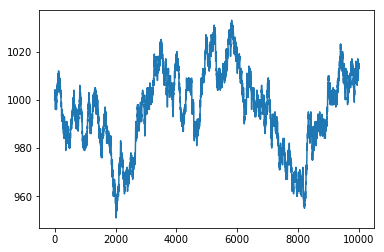

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

cash = np.zeros(10000)
cash[0] = 1000
outcome = np.random.binomial(9, 0.5, size=len(cash))
for i in range(1, len(cash)):
    if outcome[i] < 5:
        cash[i] = cash[i-1] - 1
    elif outcome[i] < 10:
        cash[i] = cash[i-1] + 1
    else:
        raise AssertionError("Unexpected outcome: "+outcome)
plt.plot(np.arange(len(cash)), cash)

## Numpy masked array
### 掩码为True的项被屏蔽，掩码为False的项保留

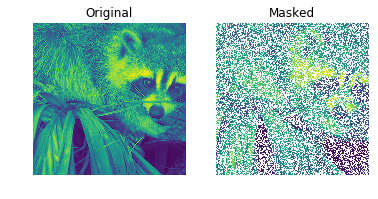

mask: [[0 1 0 ... 1 1 1]
 [1 1 0 ... 1 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 1 1]
 [1 1 0 ... 1 1 1]
 [0 0 0 ... 0 1 0]]
masked_array: [[121 -- 153 ... -- -- --]
 [-- -- 130 ... -- 68 --]
 [73 94 115 ... 70 69 --]
 ...
 [-- 94 107 ... 14 -- --]
 [-- -- 112 ... -- -- --]
 [85 97 111 ... 23 -- 23]]


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.misc as misc
import numpy as np

face = misc.face()[:768,:768,0]
random_mask = np.random.randint(0, 2, face.shape)

plt.subplot(121)
plt.title("Original")
plt.imshow(face)
plt.axis('off')

masked_array = np.ma.array(face, mask = random_mask)
plt.subplot(122)
plt.title('Masked')
plt.imshow(masked_array)
plt.axis('off')

plt.show()
print('mask:', random_mask)
print('masked_array:', masked_array)